In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Markdown in my notebook**
I want to see if there is any relationship between the weather and pets being reported as lost. This Markdown and the following markdown/comments will resolve **Requirement 5**

**Requirement 1** - Loading two data sources

In [5]:
#read two datasources in as csv
weather = pd.read_csv('louisville_weather_2022.csv')
animals = pd.read_csv('Louisville_Metro_KY_-_Animal_Service_Intake_and_Outcome.csv')

**Requirement 2** - Clean and operate on the data while combining them.

I am going to start by just looking at the datasets shape, info, describe, and head

In [6]:
weather.head() #looks like some of my columns do have names. Need to fix this. The data goes High - Avg - Low for each

,Time,Temperature (°F),Unnamed: 2,Unnamed: 3,Dew Point (°F),Unnamed: 5,Unnamed: 6,Humidity (%),Unnamed: 8,Unnamed: 9,Wind Speed (mph),Unnamed: 11,Unnamed: 12,Pressure (in),Unnamed: 14,Unnamed: 15,Precipitation (in)
0,1/1/22,64,58.3,55,60,56.8,53,100,94.8,87,15,4.7,0,29.2,29.1,29.1,0.77
1,1/2/22,57,41.4,31,55,37.4,23,97,85.8,72,16,12.6,5,29.6,29.4,29.1,1.47
2,1/3/22,37,30.4,25,23,19.3,16,75,64.0,46,20,8.8,0,29.9,29.8,29.6,0.00
3,1/4/22,46,36.1,24,35,26.8,21,92,70.6,47,17,10.7,0,29.9,29.6,29.3,0.00
4,1/5/22,50,43.3,30,34,26.0,14,61,51.2,34,23,17.1,8,29.5,29.4,29.3,0.00


In [9]:
weather.shape #365 rows and 17 columns, 365 days in a year, 1 day per row, nice!

(365, 17)

In [11]:
weather.info() #No missing data and mix of floats and ints with the date being an object might convert to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            365 non-null    object 
 1   Temp_High       365 non-null    int64  
 2   Temp_Avg        365 non-null    float64
 3   Temp_Low        365 non-null    int64  
 4   DewPoint_High   365 non-null    int64  
 5   DewPoint_Avg    365 non-null    float64
 6   DewPoint_Low    365 non-null    int64  
 7   Humidity_High   365 non-null    int64  
 8   Humidity_Avg    365 non-null    float64
 9   Humidity_Low    365 non-null    int64  
 10  WindSpeed_High  365 non-null    int64  
 11  WindSpeed_Avg   365 non-null    float64
 12  WindSpeed_Low   365 non-null    int64  
 13  Pressure_High   365 non-null    float64
 14  Pressure_Avg    365 non-null    float64
 15  Pressure_Low    365 non-null    float64
 16  Precipitation   365 non-null    float64
dtypes: float64(8), int64(8), object(1)


In [12]:
weather.describe() #summarized stats careful looking at average of averages

,Temp_High,Temp_Avg,Temp_Low,DewPoint_High,DewPoint_Avg,DewPoint_Low,Humidity_High,Humidity_Avg,Humidity_Low,WindSpeed_High,WindSpeed_Avg,WindSpeed_Low,Pressure_High,Pressure_Avg,Pressure_Low,Precipitation
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,68.279452,59.090959,50.158904,50.673973,45.418082,39.652055,82.539726,63.658904,43.720548,15.482192,8.067123,1.945205,29.614247,29.528767,29.436712,0.111781
std,19.192310,18.470931,18.518686,18.330768,18.866473,19.948065,12.011061,13.885790,15.018075,5.729990,3.353809,2.704750,0.168428,0.172792,0.180263,0.295432
min,6.000000,-0.200000,-6.000000,1.000000,-8.400000,-14.000000,42.000000,31.200000,0.000000,5.000000,1.300000,0.000000,29.200000,29.100000,28.800000,0.000000
25%,54.000000,44.500000,35.000000,36.000000,30.100000,23.000000,75.000000,54.000000,33.000000,12.000000,5.600000,0.000000,29.500000,29.400000,29.300000,0.000000
50%,72.000000,61.000000,51.000000,54.000000,46.800000,41.000000,84.000000,63.500000,43.000000,15.000000,7.700000,0.000000,29.600000,29.500000,29.400000,0.000000
75%,84.000000,75.200000,67.000000,67.000000,61.600000,58.000000,93.000000,72.600000,53.000000,18.000000,10.300000,5.000000,29.700000,29.600000,29.600000,0.040000
max,101.000000,90.500000,83.000000,79.000000,75.400000,72.000000,100.000000,95.200000,91.000000,44.000000,22.000000,16.000000,30.100000,30.000000,29.900000,2.250000


Fix the column names for the weather dataset

In [8]:
column_names = ['Date', 'Temp_High', 'Temp_Avg', 'Temp_Low', 'DewPoint_High', 'DewPoint_Avg', 'DewPoint_Low',
                'Humidity_High', 'Humidity_Avg', 'Humidity_Low', 'WindSpeed_High', 'WindSpeed_Avg', 'WindSpeed_Low',
                'Pressure_High', 'Pressure_Avg', 'Pressure_Low', 'Precipitation']
weather.columns = column_names
weather.head()

,Date,Temp_High,Temp_Avg,Temp_Low,DewPoint_High,DewPoint_Avg,DewPoint_Low,Humidity_High,Humidity_Avg,Humidity_Low,WindSpeed_High,WindSpeed_Avg,WindSpeed_Low,Pressure_High,Pressure_Avg,Pressure_Low,Precipitation
0,1/1/22,64,58.3,55,60,56.8,53,100,94.8,87,15,4.7,0,29.2,29.1,29.1,0.77
1,1/2/22,57,41.4,31,55,37.4,23,97,85.8,72,16,12.6,5,29.6,29.4,29.1,1.47
2,1/3/22,37,30.4,25,23,19.3,16,75,64.0,46,20,8.8,0,29.9,29.8,29.6,0.00
3,1/4/22,46,36.1,24,35,26.8,21,92,70.6,47,17,10.7,0,29.9,29.6,29.3,0.00
4,1/5/22,50,43.3,30,34,26.0,14,61,51.2,34,23,17.1,8,29.5,29.4,29.3,0.00


In [7]:
animals.head()

,kennel,animalid,jurisdiction,intype,insubtype,indate,surreason,outtype,outsubtype,outdate,animaltype,sex,bites,petsize,color,breed,sourcezipcode,ObjectId
0,FREEZER,A665474,40211,OWNER SUR,EUTH REQ,2019/06/11 00:00:00,AGG PEOPLE,EUTH,REQUESTED,2019/06/11 00:00:00,DOG,F,N,LARGE,BR BRINDLE,PRESA CANARIO,40211,1
1,K106B,A727650,40211,STRAY,OTC,2022/11/17 00:00:00,STRAY,RTO,IN KENNEL,2022/11/18 00:00:00,DOG,S,N,SMALL,TRICOLOR,BEAGLE,40219,2
2,INTAKE,A727842,40202,DISPOSAL,WILDLIFE,2022/11/23 00:00:00,STRAY,EUTH,RABIESTEST,2022/11/23 00:00:00,OTHER,U,Y,SMALL,BLACK,BAT,40216,3
3,FREEZER,A728518,40202,STRAY,OTC,2022/12/08 00:00:00,UNKNOWN,EUTH,RABIESTEST,2022/12/08 00:00:00,OTHER,U,Y,SMALL,BROWN,BAT,40216,4
4,VET,A656784,40228,STRAY,OTC,2019/01/18 00:00:00,STRAY,RTO,IN KENNEL,2019/01/23 00:00:00,DOG,N,N,MED,BLACK / TAN,GERM SHEPHERD,NaN,5


In [13]:
animals.shape

(48072, 18)

In [14]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48072 entries, 0 to 48071
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   kennel         48072 non-null  object
 1   animalid       48072 non-null  object
 2   jurisdiction   37017 non-null  object
 3   intype         48072 non-null  object
 4   insubtype      48020 non-null  object
 5   indate         48072 non-null  object
 6   surreason      37017 non-null  object
 7   outtype        38686 non-null  object
 8   outsubtype     29447 non-null  object
 9   outdate        38704 non-null  object
 10  animaltype     48072 non-null  object
 11  sex            47289 non-null  object
 12  bites          37020 non-null  object
 13  petsize        46008 non-null  object
 14  color          48070 non-null  object
 15  breed          48053 non-null  object
 16  sourcezipcode  43363 non-null  object
 17  ObjectId       48072 non-null  int64 
dtypes: int64(1), object(17)
me

In [15]:
animals.describe() #lots of catagorical columns not much continuous/ordinal data currently

,ObjectId
count,48072.000000
mean,24036.500000
std,13877.335407
min,1.000000
25%,12018.750000
50%,24036.500000
75%,36054.250000
max,48072.000000


I want to get the total reported lost per day. I need to filter down to only the lost pets data from the dataset and the groupby day.

According to my data dictionary I want to look at intake type of **LOST** and an intake subtype of **WEB**

In [29]:
# Create a mask with "and" criteria for two columns
mask = (animals['intype'] == 'LOST') & (animals['insubtype'] == 'WEB')
animal_lost = animals[mask]
animal_lost.head()

,kennel,animalid,jurisdiction,intype,insubtype,indate,surreason,outtype,outsubtype,outdate,animaltype,sex,bites,petsize,color,breed,sourcezipcode,ObjectId
332,LOST,A734937,NaN,LOST,WEB,2023/03/20 00:00:00,NaN,NaN,NaN,NaN,DOG,M,NaN,LARGE,UNKNOWN,GERM SHEPHERD,40220,333
604,LOST,A735454,NaN,LOST,WEB,2023/03/29 00:00:00,NaN,NaN,NaN,NaN,CAT,F,NaN,SMALL,BLACK,DOMESTIC LH,40272,605
1094,LOST,A727639,NaN,LOST,WEB,2022/11/14 00:00:00,NaN,NaN,NaN,NaN,DOG,M,NaN,LARGE,UNKNOWN,GOLDEN RETR,40258,1095
1268,LOST,A725596,NaN,LOST,WEB,2022/10/15 00:00:00,NaN,NaN,NaN,NaN,CAT,M,NaN,MED,UNKNOWN,BENGAL,40206,1269
1555,LOST,A728116,NaN,LOST,WEB,2022/11/26 00:00:00,NaN,NaN,NaN,NaN,CAT,F,NaN,SMALL,UNKNOWN,AMER SH,40222,1556


In [86]:
lost_pivot_table = pd.pivot_table(animal_lost, index='indate', aggfunc='size', columns = 'animaltype', fill_value=0)
lost_pivot_table.reset_index(inplace = True)
# Display the pivot table and rename columns
lost_pivot_table

animaltype,indate,BIRD,CAT,DOG,LIVESTOCK,OTHER
0,2019/01/01 00:00:00,0,3,4,0,0
1,2019/01/02 00:00:00,0,6,5,0,0
2,2019/01/03 00:00:00,0,2,4,0,0
3,2019/01/04 00:00:00,0,0,7,0,0
4,2019/01/05 00:00:00,0,5,4,0,0
...,...,...,...,...,...,...
1538,2023/05/02 00:00:00,0,3,4,0,0
1539,2023/05/03 00:00:00,0,2,4,0,0
1540,2023/05/04 00:00:00,0,4,0,0,0
1541,2023/05/05 00:00:00,0,5,7,0,0


I want to join my two dataframes but my dates are in different formats

In [87]:
lost_pivot_table['datetime']  = pd.to_datetime(lost_pivot_table['indate'])
weather['datetime']  = pd.to_datetime(weather['Date'])

In [90]:
joined_data = weather.merge(lost_pivot_table, on = 'datetime')
joined_data['cats_and_dogs'] = joined_data['CAT'] + joined_data['DOG']
joined_data

,Date,Temp_High,Temp_Avg,Temp_Low,DewPoint_High,DewPoint_Avg,DewPoint_Low,Humidity_High,Humidity_Avg,Humidity_Low,...,Pressure_Low,Precipitation,datetime,indate,BIRD,CAT,DOG,LIVESTOCK,OTHER,cats_and_dogs
0,1/1/22,64,58.3,55,60,56.8,53,100,94.8,87,...,29.1,0.77,2022-01-01,2022/01/01 00:00:00,0,1,9,0,0,10
1,1/2/22,57,41.4,31,55,37.4,23,97,85.8,72,...,29.1,1.47,2022-01-02,2022/01/02 00:00:00,0,0,1,0,0,1
2,1/3/22,37,30.4,25,23,19.3,16,75,64.0,46,...,29.6,0.00,2022-01-03,2022/01/03 00:00:00,0,0,3,0,0,3
3,1/4/22,46,36.1,24,35,26.8,21,92,70.6,47,...,29.3,0.00,2022-01-04,2022/01/04 00:00:00,0,4,2,0,0,6
4,1/5/22,50,43.3,30,34,26.0,14,61,51.2,34,...,29.3,0.00,2022-01-05,2022/01/05 00:00:00,0,2,5,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,12/27/22,34,31.7,29,29,27.0,24,93,83.0,76,...,29.6,0.03,2022-12-27,2022/12/27 00:00:00,0,0,7,0,0,7
357,12/28/22,53,39.8,26,31,26.7,23,96,63.3,41,...,29.5,0.00,2022-12-28,2022/12/28 00:00:00,0,0,1,0,0,1
358,12/29/22,59,55.9,49,51,43.3,29,75,63.3,46,...,29.5,0.00,2022-12-29,2022/12/29 00:00:00,0,1,3,0,0,4
359,12/30/22,68,61.8,56,53,45.7,44,90,56.3,43,...,29.4,0.01,2022-12-30,2022/12/30 00:00:00,0,4,0,0,0,4


**Requirement 3** - Creating visualizations

<AxesSubplot:title={'center':'Total cats and dogs reported lost per month'}, xlabel='Month', ylabel='Total'>

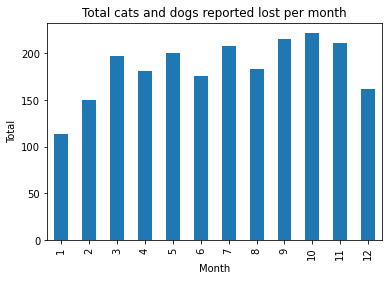

In [99]:
# Group by month and calculate the sum
monthly_totals = joined_data.groupby(joined_data['datetime'].dt.month)['cats_and_dogs'].sum()

# Plot the results
monthly_totals.plot(kind='bar', xlabel='Month', ylabel='Total', title='Total cats and dogs reported lost per month')


Let's look at how temperature relates to animals being reported lost

<AxesSubplot:xlabel='Temp_Avg', ylabel='cats_and_dogs'>

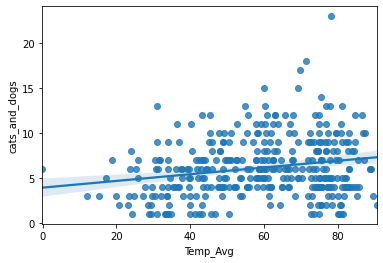

In [97]:
sns.regplot(data = joined_data, x='Temp_Avg', y='cats_and_dogs')

<AxesSubplot:xlabel='Temp_Avg', ylabel='cats_and_dogs'>

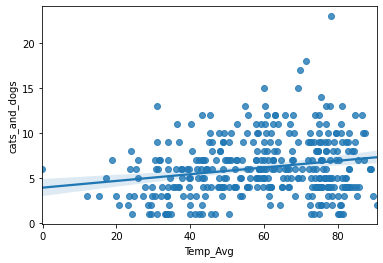

In [93]:
sns.regplot(data = joined_data, x='Temp_Avg', y='cats_and_dogs')

<AxesSubplot:xlabel='Temp_Avg', ylabel='CAT'>

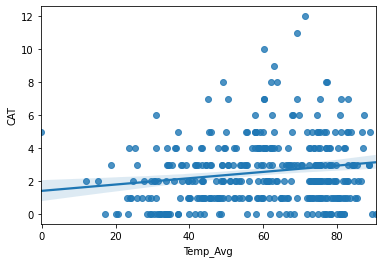

In [96]:
sns.regplot(data = joined_data, x='Temp_Avg', y='CAT')

In [117]:
# Group by month and calculate the sum
monthly_totals_precip = joined_data.groupby(joined_data['datetime'].dt.month)['Precipitation'].sum()

<AxesSubplot:label='ed2049e0-361d-4a0f-afeb-d245d6846eb0', xlabel='datetime', ylabel='cats_and_dogs'>

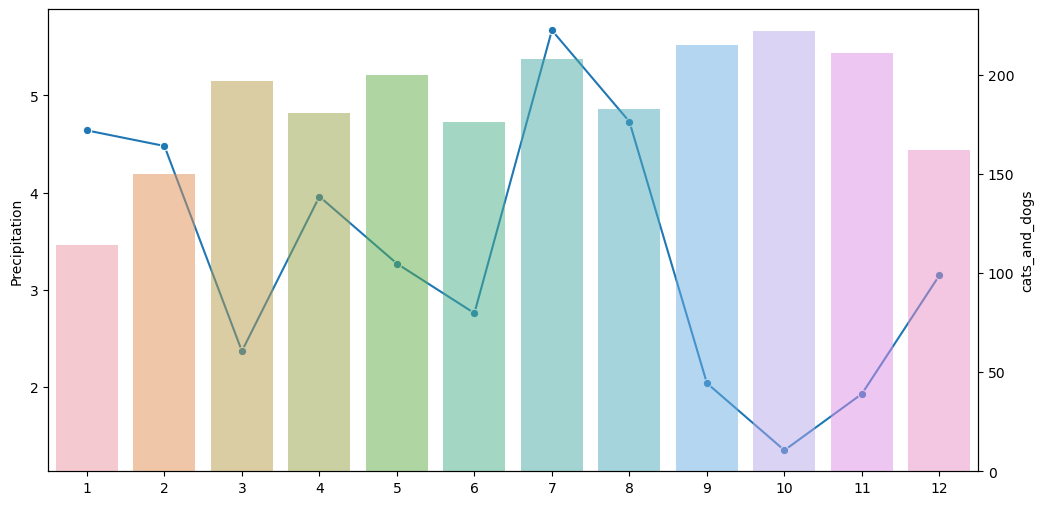

In [116]:
combo = monthly_totals_precip.to_frame().join(monthly_totals.to_frame())
combo.reset_index(inplace=True)


matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = combo['Precipitation'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = combo, x='datetime', y='cats_and_dogs', alpha=0.5, ax=ax2)